In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\Housing.csv")

In [4]:
ohc = OneHotEncoder(sparse_output=False,drop="first")
ct = make_column_transformer((ohc,make_column_selector(dtype_include = object)),
                             ("passthrough",make_column_selector(dtype_include = ["int64","float64"])),
                             verbose_feature_names_out=False).set_output(transform='pandas')
dum_np = ct.fit_transform(df)
X = dum_np.drop("price",axis=1)
y = dum_np["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

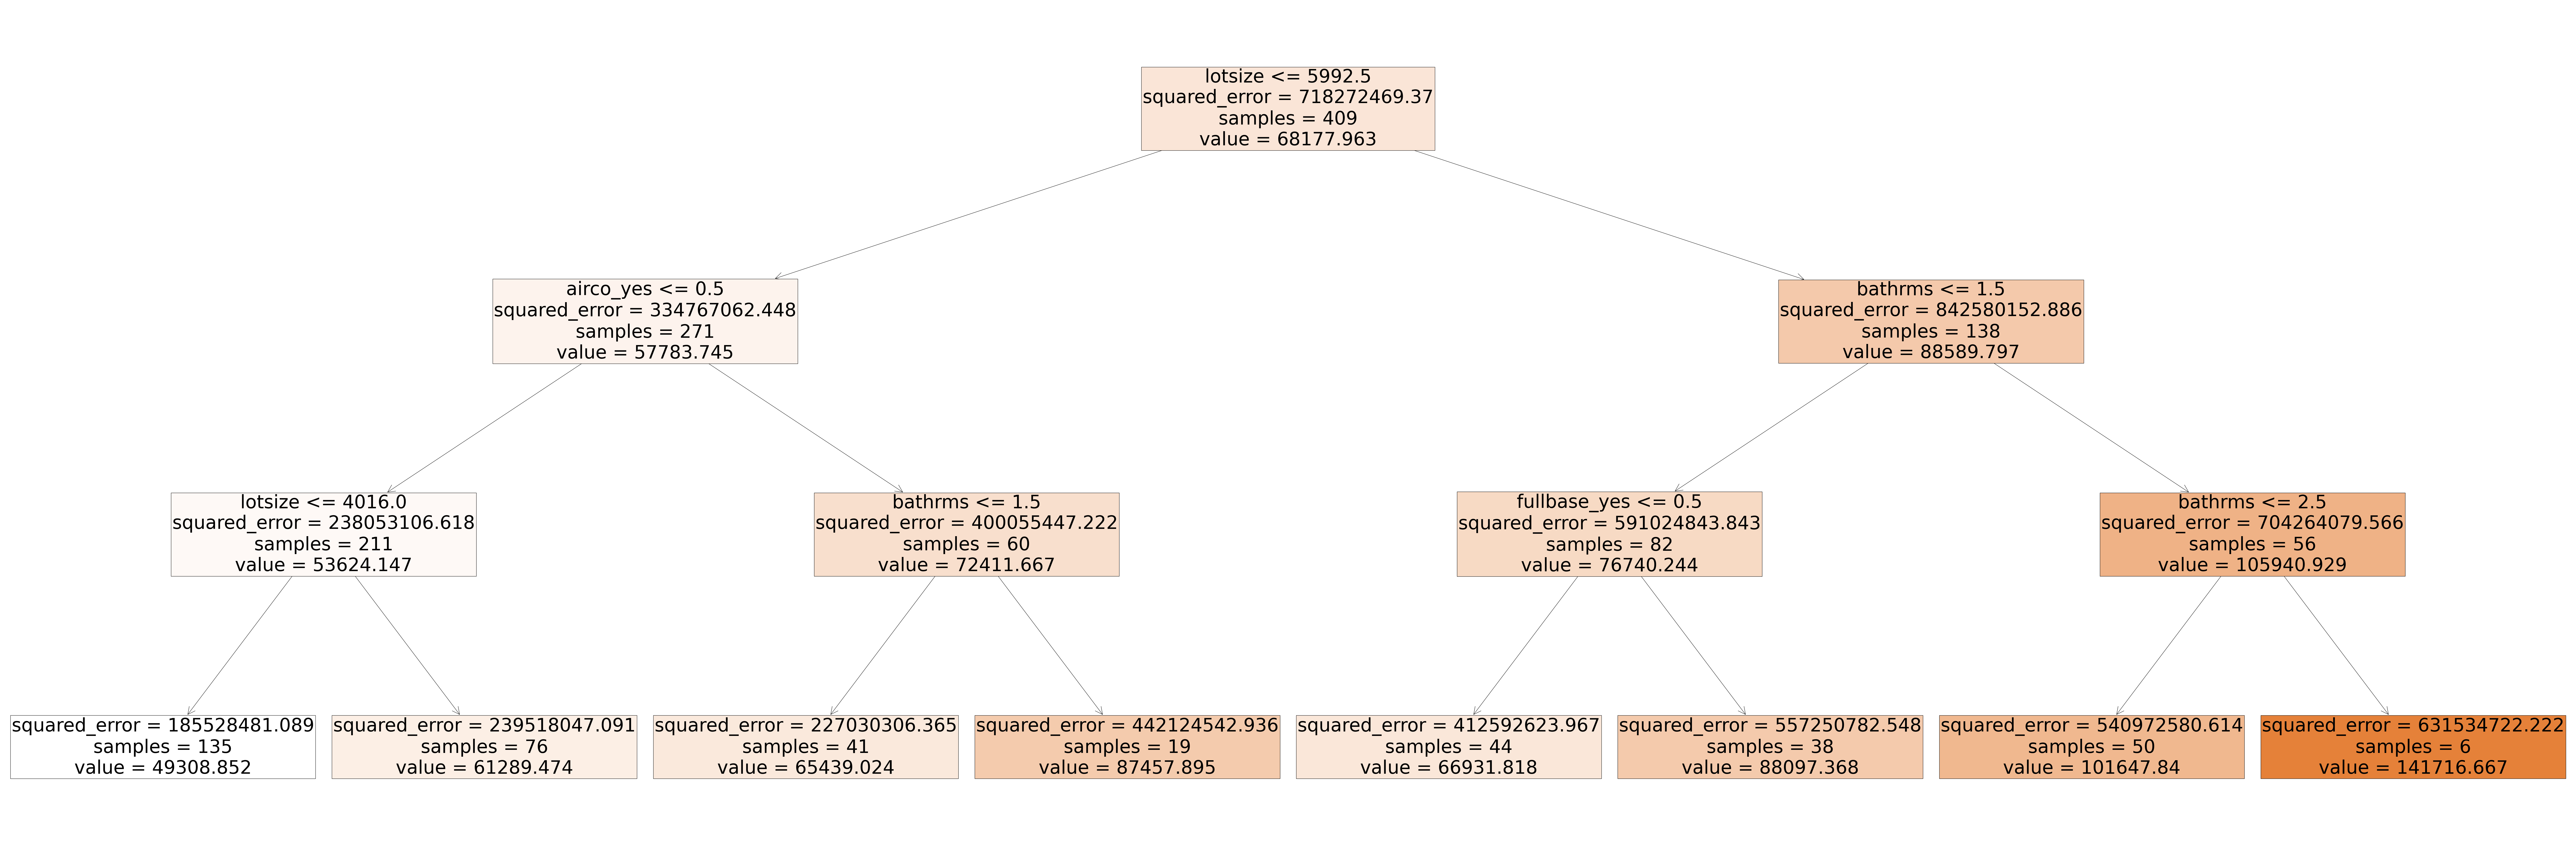

In [15]:
dtr = DecisionTreeRegressor(max_depth = 3)
dtr.fit(X_train,y_train)

plt.figure(figsize=(150,50))
plot_tree(dtr,feature_names=list(X.columns), filled=True,fontsize=60)
plt.show() 

In [8]:
y_pred = dtr.predict(X_test)
print(r2_score(y_test, y_pred))

0.4482725397082009


In [ ]:
## Grid search for parameters max_deapth, min samples split, mean samples leaf

In [17]:
kfold = KFold(n_splits =5,shuffle = True, random_state = 24)
dtr = DecisionTreeRegressor(random_state=24)
params= {"max_depth":[2,3,4,6,8,10],"min_samples_split": np.arange(2,35,5),"min_samples_leaf":np.arange(1,35,5)}
gcv = GridSearchCV(dtr,param_grid=params,cv=kfold,scoring="r2")
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 2}
0.52198819387929


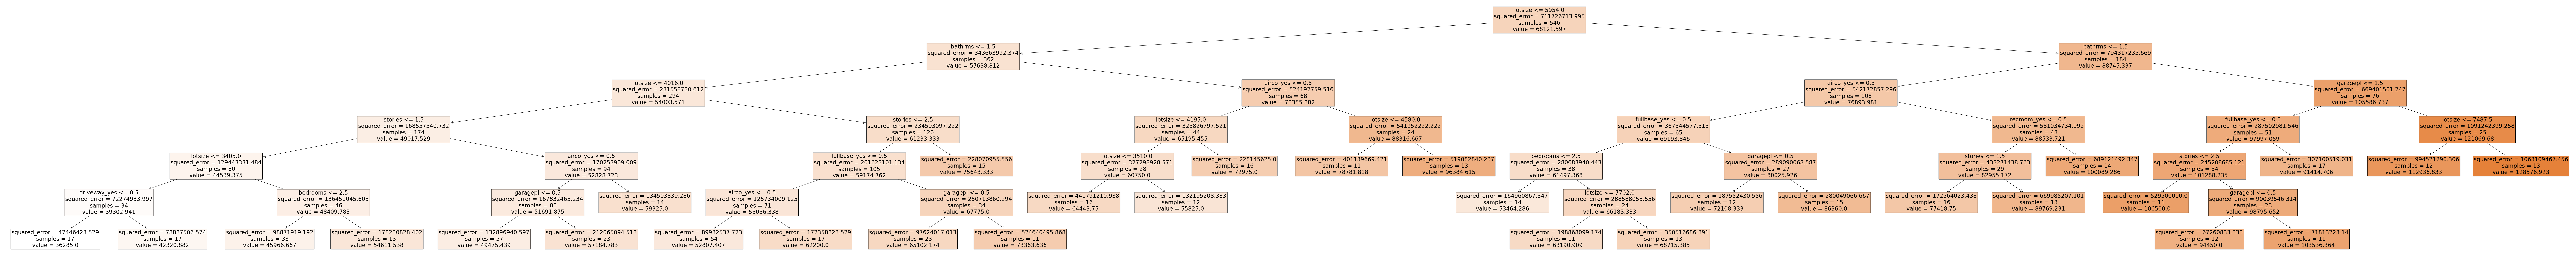

In [21]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(200,20))
plot_tree(best_tree,feature_names=list(X.columns), class_names=['0','1'], filled=True,fontsize=24)
plt.show() 